In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets # 이미 train, test 가 나눠져 있다.
from keras.utils import np_utils

In [35]:
(X_train, Y_train), (X_test, Y_test) = datasets.mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


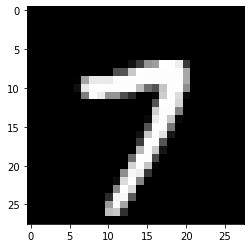

7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  18  61 148 157 254
  254 238  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  79  85 200 254 

In [36]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap = 'gray')
plt.show()
print(Y_train[my_sample]) # Y 값 one hot, scailing
print(X_train[my_sample]) # 이미지는 각자의 픽셀의 값을 숫자로 나타낸 것

In [37]:
y_train = np_utils.to_categorical(Y_train) #ont hot을 자동으로 해주는 함수, to_categorical, OneHotEncoder, get_dummies 
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [38]:
x_train = X_train.reshape(-1, 28 * 28)
x_test = X_test.reshape(-1, 28 * 28)
x_train = x_train / 255 # MinMaxScaler
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [39]:
model = Sequential()
model.add(Dense(128, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [40]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [41]:
fit_hist = model.fit(x_train, y_train, batch_size=128, epochs = 15, validation_split = 0.2, verbose = 1)

Epoch 1/15
375/375 [==============================] - 3s 6ms/step - loss: 0.3588 - accuracy: 0.8979 - val_loss: 0.1691 - val_accuracy: 0.9522
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 0.1455 - accuracy: 0.9568 - val_loss: 0.1237 - val_accuracy: 0.9630
Epoch 3/15
375/375 [==============================] - 3s 9ms/step - loss: 0.1032 - accuracy: 0.9692 - val_loss: 0.1168 - val_accuracy: 0.9653
Epoch 4/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.1048 - val_accuracy: 0.9697
Epoch 5/15
375/375 [==============================] - 4s 10ms/step - loss: 0.0606 - accuracy: 0.9813 - val_loss: 0.0952 - val_accuracy: 0.9717
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.1012 - val_accuracy: 0.9715
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0943 - val_accuracy: 0.9728
Epoc

In [42]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accurecy', score[1])

Final test set accurecy 0.9771999716758728


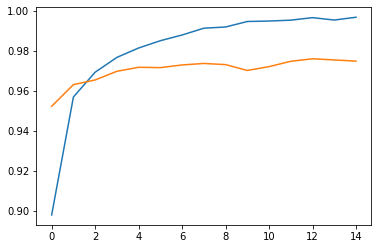

In [43]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

6
[[1.3736175e-07 2.8536823e-08 9.2365793e-10 4.6305038e-10 4.0105555e-10
  6.2895268e-08 9.9999976e-01 1.1015153e-12 2.3605482e-08 3.7914418e-11]]
6


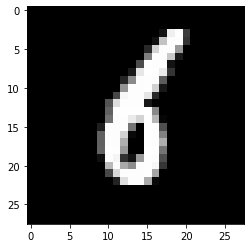

In [44]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap = 'gray')
print(Y_test[my_sample])
pred = model.predict(x_test[my_sample].reshape(-1, 28 * 28))
print(pred)
print(np.argmax(pred))